In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model, Sequential
from keras.layers import Dense, Flatten, Dropout, \
    Conv2D, MaxPooling2D, AveragePooling2D
from keras.metrics import AUC, Recall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from _common import NUM_LABEL_COLS, RANDOM_SEED
from _tenor_lmsc_brass_ok import TEST_SIZE, VALIDATION_SIZE, \
    BANDS, TIME_SLICES, master, lmss, data, target
# Note that records are read from pickle, selected, filtered,
# and scaled with `sklearn.preprocessing.StandardScaler` 
# in `_tenor_lmsc_brass_ok.py`.

In [3]:
x_train, x_test, y_train, y_test = \
     train_test_split(data, target,
                      test_size=TEST_SIZE,
                      random_state=RANDOM_SEED)

In [4]:
# Reshape for input to 2D convolutional layer
x_train = x_train.reshape(x_train.shape[0], BANDS, TIME_SLICES, 1)
x_test = x_test.reshape(x_test.shape[0], BANDS, TIME_SLICES, 1)

In [6]:
dependencies = {
    'recall': Recall
}

fn = './data/keras_models/tenor_cnn/tenor_cnn_F.h5'
model = load_model(fn, custom_objects=dependencies, compile=False)

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall'), 'accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
NUM_EPOCHS = 12
BATCH_SIZE = 32
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)


Train on 4276 samples, validate on 1070 samples
Epoch 1/12
4276/4276 [==============================] - 117s 27ms/step - loss: 0.2923 - recall: 0.9141 - accuracy: 0.8990 - val_loss: 0.2417 - val_recall: 0.9232 - val_accuracy: 0.9112
Epoch 2/12
4276/4276 [==============================] - 115s 27ms/step - loss: 0.1919 - recall: 0.9322 - accuracy: 0.9270 - val_loss: 0.2316 - val_recall: 0.9347 - val_accuracy: 0.9131
Epoch 3/12
4276/4276 [==============================] - 187s 44ms/step - loss: 0.1413 - recall: 0.9556 - accuracy: 0.9471 - val_loss: 0.2584 - val_recall: 0.8560 - val_accuracy: 0.8972
Epoch 4/12
4276/4276 [==============================] - 178s 42ms/step - loss: 0.0886 - recall: 0.9668 - accuracy: 0.9675 - val_loss: 0.3169 - val_recall: 0.9328 - val_accuracy: 0.9103
Epoch 5/12
4276/4276 [==============================] - 171s 40ms/step - loss: 0.0763 - recall: 0.9712 - accuracy: 0.9701 - val_loss: 0.4023 - val_recall: 0.8791 - val_accuracy: 0.9000
Epoch 6/12
4276/4276 [====

In [10]:
# auc, 
loss, recall, accuracy = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))
print('Accuracy: %.2f' % (accuracy * 100))

1337/1337 [==============================] - 7s 5ms/step
Recall: 86.70
Accuracy: 90.13


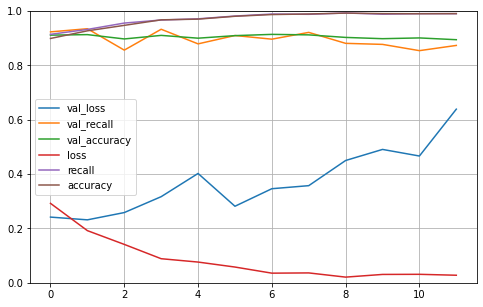

In [11]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.save('./data/keras_models/tenor_brass_ok_cnn_F.h5')